# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus São Carlos</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Fernando Messias da Silva

**RA**: 489450


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [2]:
#Import Packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Load csv file

#FILES_DIRECTORY = "/kaggle/input/ufscar-am-2024-projeto-final"
FILES_DIRECTORY = "dados"

# Liste o conteúdo do diretório
conteudo_diretorio = os.listdir(FILES_DIRECTORY)

# Imprima o conteúdo do diretório
for item in conteudo_diretorio:
    print(item)

df_rhp = pd.read_csv(os.path.join(FILES_DIRECTORY, "RHP_data.csv"), sep=',', encoding='utf-8')
df_train = pd.read_csv(os.path.join(FILES_DIRECTORY, "train.csv"), sep=',', index_col=None)
df_rhp_classe = pd.merge(df_rhp, df_train, on='Id')

RHP_data.csv
sample_submission.csv
test.csv
train.csv


### 1. Evaluate the dataset at a macro level to understand the data

In [4]:
# Check the first lines of DataFrame
display(df_rhp_classe.head())

# Check the dimensions of the file
print(df_rhp_classe.shape)

# Check file information
print(df_rhp_classe.info())

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,2,3.50,50,14.00,25/05/05,19/05/05,0.02,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia,Anormal
1,3,0.00,0,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN,Anormal
2,4,8.10,65,19.00,15/10/09,21/04/09,0.5,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN,Anormal
3,6,26.00,112,21.00,22/08/03,26/05/99,4.4,GS,Normais,100.00,60.00,Normal,Desdob fixo,ausente,100,Assintomático,NaN,M,2 - Check-up,NaN,Anormal
4,7,40.00,151,18.00,14/01/08,14/08/95,12.89,SAME,Normais,NaN,NaN,Não Calculado,Normal,ausente,96,Dor precordial,NaN,M,5 - Parecer cardiológico,NaN,Anormal


(14727, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14727 entries, 0 to 14726
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             14727 non-null  int64  
 1   Peso           14467 non-null  float64
 2   Altura         14727 non-null  int64  
 3   IMC            10710 non-null  float64
 4   Atendimento    13744 non-null  object 
 5   DN             13351 non-null  object 
 6   IDADE          13351 non-null  object 
 7   Convenio       10234 non-null  object 
 8   PULSOS         13535 non-null  object 
 9   PA SISTOLICA   8232 non-null   float64
 10  PA DIASTOLICA  8222 non-null   float64
 11  PPA            14530 non-null  object 
 12  B2             13550 non-null  object 
 13  SOPRO          13562 non-null  object 
 14  FC             12832 non-null  object 
 15  HDA 1          10113 non-null  object 
 16  HDA2           539 non-null    object 
 17  SEXO           14724 non-null  object 


### 2. Check for null values in the dataset

In [5]:
# Check for null values in the dataset
df_rhp_classe.isnull().sum()

Id                   0
Peso               260
Altura               0
IMC               4017
Atendimento        983
DN                1376
IDADE             1376
Convenio          4493
PULSOS            1192
PA SISTOLICA      6495
PA DIASTOLICA     6505
PPA                197
B2                1177
SOPRO             1165
FC                1895
HDA 1             4614
HDA2             14188
SEXO                 3
MOTIVO1           1073
MOTIVO2           4059
CLASSE            1168
dtype: int64

### 3. Check the unique values of each variable

In [30]:
# Total of unique values in each variable
unique_values = []
for i in df_rhp_classe.columns[0:22].tolist():
    print(i, ':', len(df_rhp_classe[i].astype('str').value_counts()))
    unique_values.append([i, df_rhp_classe[i].nunique()])

# Visualiza valores unicos da IDADE
df_rhp_classe['IMC']

Id : 14727
Peso : 695
Altura : 162
IMC : 56
Atendimento : 2064
DN : 6008
IDADE : 1928
Convenio : 408
PULSOS : 8
PA SISTOLICA : 46
PA DIASTOLICA : 36
PPA : 10
B2 : 6
SOPRO : 8
FC : 120
HDA 1 : 9
HDA2 : 9
SEXO : 7
MOTIVO1 : 6
MOTIVO2 : 17
CLASSE : 4


0        14.00
1          NaN
2        19.00
3        21.00
4        18.00
5        20.00
6        21.00
7        16.00
8        19.00
9          NaN
10       14.00
11       17.00
12       22.00
13       13.00
14       22.00
15         NaN
16       17.00
17       16.00
18       15.00
19         NaN
20       26.00
21       16.00
22       12.00
23       17.00
24         NaN
25       19.00
26       16.00
27       10.00
28       17.00
29       21.00
30       17.00
31       15.00
32       18.00
33       17.00
34         NaN
35       21.00
36       26.00
37       15.00
38       17.00
39       20.00
40       18.00
41       17.00
42       21.00
43         NaN
44       18.00
45       18.00
46       25.00
47       21.00
48       21.00
49         NaN
50         NaN
51         NaN
52         NaN
53       18.00
54       16.00
55       22.00
56       14.00
57         NaN
58         NaN
59       21.00
60         NaN
61         NaN
62         NaN
63       14.00
64         NaN
65       18.00
66       1

### 4. Visualize main statistics of the dataset
Média | Mediana | Desvio Padrão | Quartis | Valores mínimos e máximos

In [7]:
# Check the main statistics of the dataset
df_rhp_classe.describe()

,Id,Peso,Altura,IMC,PA SISTOLICA,PA DIASTOLICA
count,"14,727.00","14,467.00","14,727.00","10,710.00","8,232.00","8,222.00"
mean,"8,946.35",20.98,82.97,17.79,101.40,62.37
std,"5,167.71",18.19,57.03,11.21,15.00,8.95
min,2.00,-40.00,0.00,0.00,10.00,6.00
25%,"4,458.50",6.00,0.00,15.00,90.00,60.00
50%,"8,926.00",17.50,98.00,17.00,100.00,60.00
75%,"13,442.50",31.00,130.00,19.00,110.00,70.00
max,"17,873.00",127.00,198.00,848.00,990.00,120.00


### 5. Check each variable individually

SEXO
F                5393
Feminino          201
Indeterminado    1332
M                7253
Masculino         480
masculino          65
dtype: int64


<Axes: title={'center': 'Sexo'}, xlabel='SEXO'>

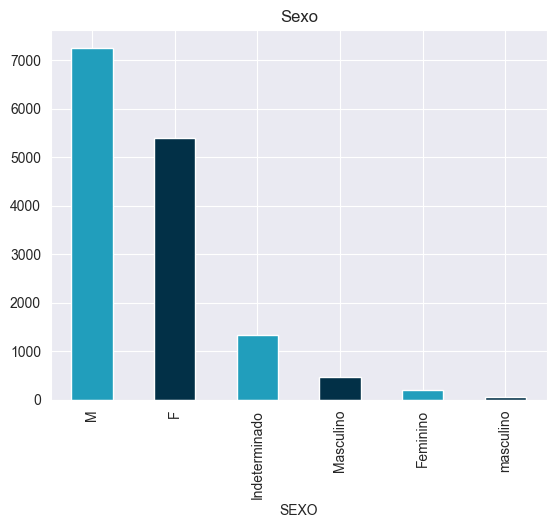

In [8]:
# Check the quantity of information by gender
print(df_rhp_classe.groupby(['SEXO']).size())

# Graphical representation
df_rhp_classe.SEXO.value_counts().plot(kind='bar', title='Sexo', color = ['#219ebc', '#023047'])

PULSOS
AMPLOS                     1
Amplos                    45
Diminuídos                17
Femorais diminuidos       36
NORMAIS                    2
Normais                13395
Outro                     39
dtype: int64


<Axes: title={'center': 'Pulsos'}, xlabel='PULSOS'>

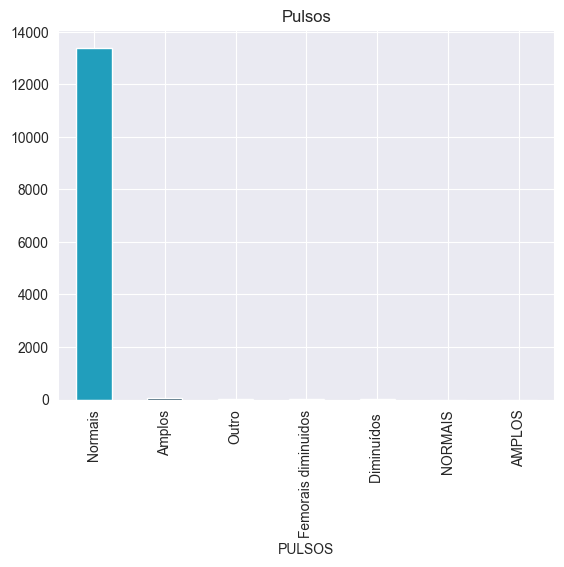

In [9]:
# Check the quantity of information by pulso
print(df_rhp_classe.groupby(['PULSOS']).size())

# Graphical representation
df_rhp_classe.PULSOS.value_counts().plot(kind='bar', title='Pulsos', color = ['#219ebc', '#023047'])

PPA
#VALUE!                1496
HAS-1 PAD                69
HAS-1 PAS               119
HAS-2 PAD                48
HAS-2 PAS               170
Normal                 4917
Não Calculado          7370
Pre-Hipertensão PAD     182
Pre-Hipertensão PAS     159
dtype: int64


<Axes: title={'center': 'PPA'}, xlabel='PPA'>

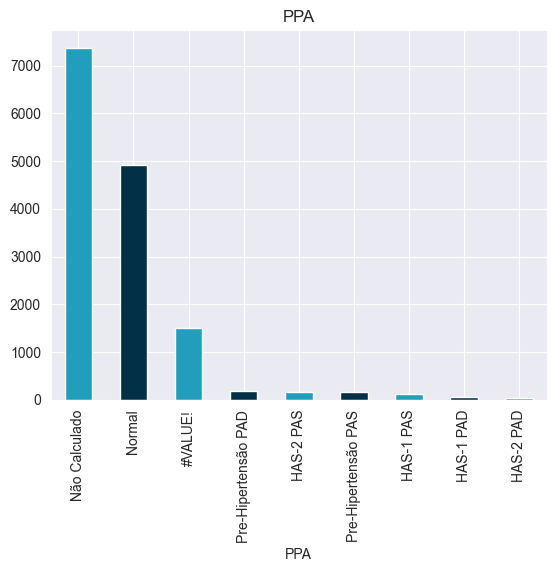

In [10]:
# Check the quantity of information by PPA
print(df_rhp_classe.groupby(['PPA']).size())

# Graphical representation
df_rhp_classe.PPA.value_counts().plot(kind='bar', title='PPA', color = ['#219ebc', '#023047'])

SOPRO
Contínuo                    17
Sistolico e diastólico       3
Sistólico                 3896
ausente                   8723
contínuo                    27
diastólico                   8
sistólico                  888
dtype: int64


<Axes: title={'center': 'SOPRO'}, xlabel='SOPRO'>

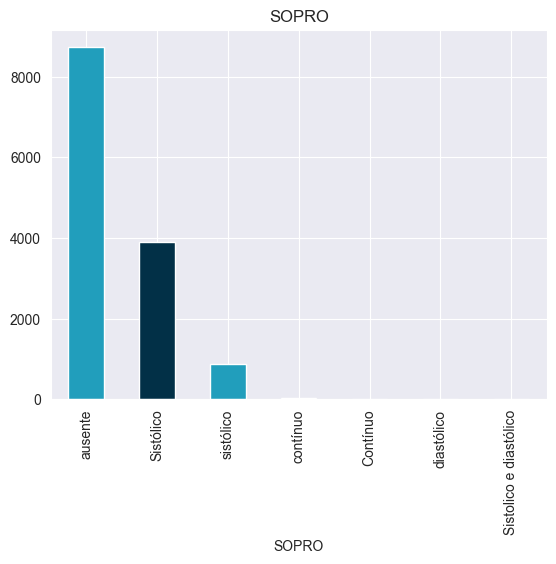

In [11]:
# Check the quantity of information by Sopro
print(df_rhp_classe.groupby(['SOPRO']).size())

# Graphical representation
df_rhp_classe.SOPRO.value_counts().plot(kind='bar', title='SOPRO', color = ['#219ebc', '#023047'])

### 6. Check if the target variable (CLASSE) is balannced

CLASSE
Anormal    5421
Normais       1
Normal     8137
dtype: int64


<Axes: title={'center': 'CLASSE'}, xlabel='CLASSE'>

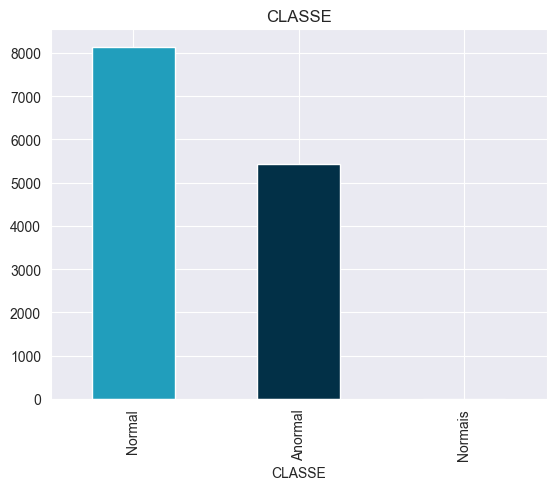

In [12]:
# Check the quantity of information by CLASSE
print(df_rhp_classe.groupby(['CLASSE']).size())
df_rhp_classe.CLASSE.value_counts().plot(kind='bar', title='CLASSE', color = ['#219ebc', '#023047'])

### 7. Evaluate each variable with the target variable

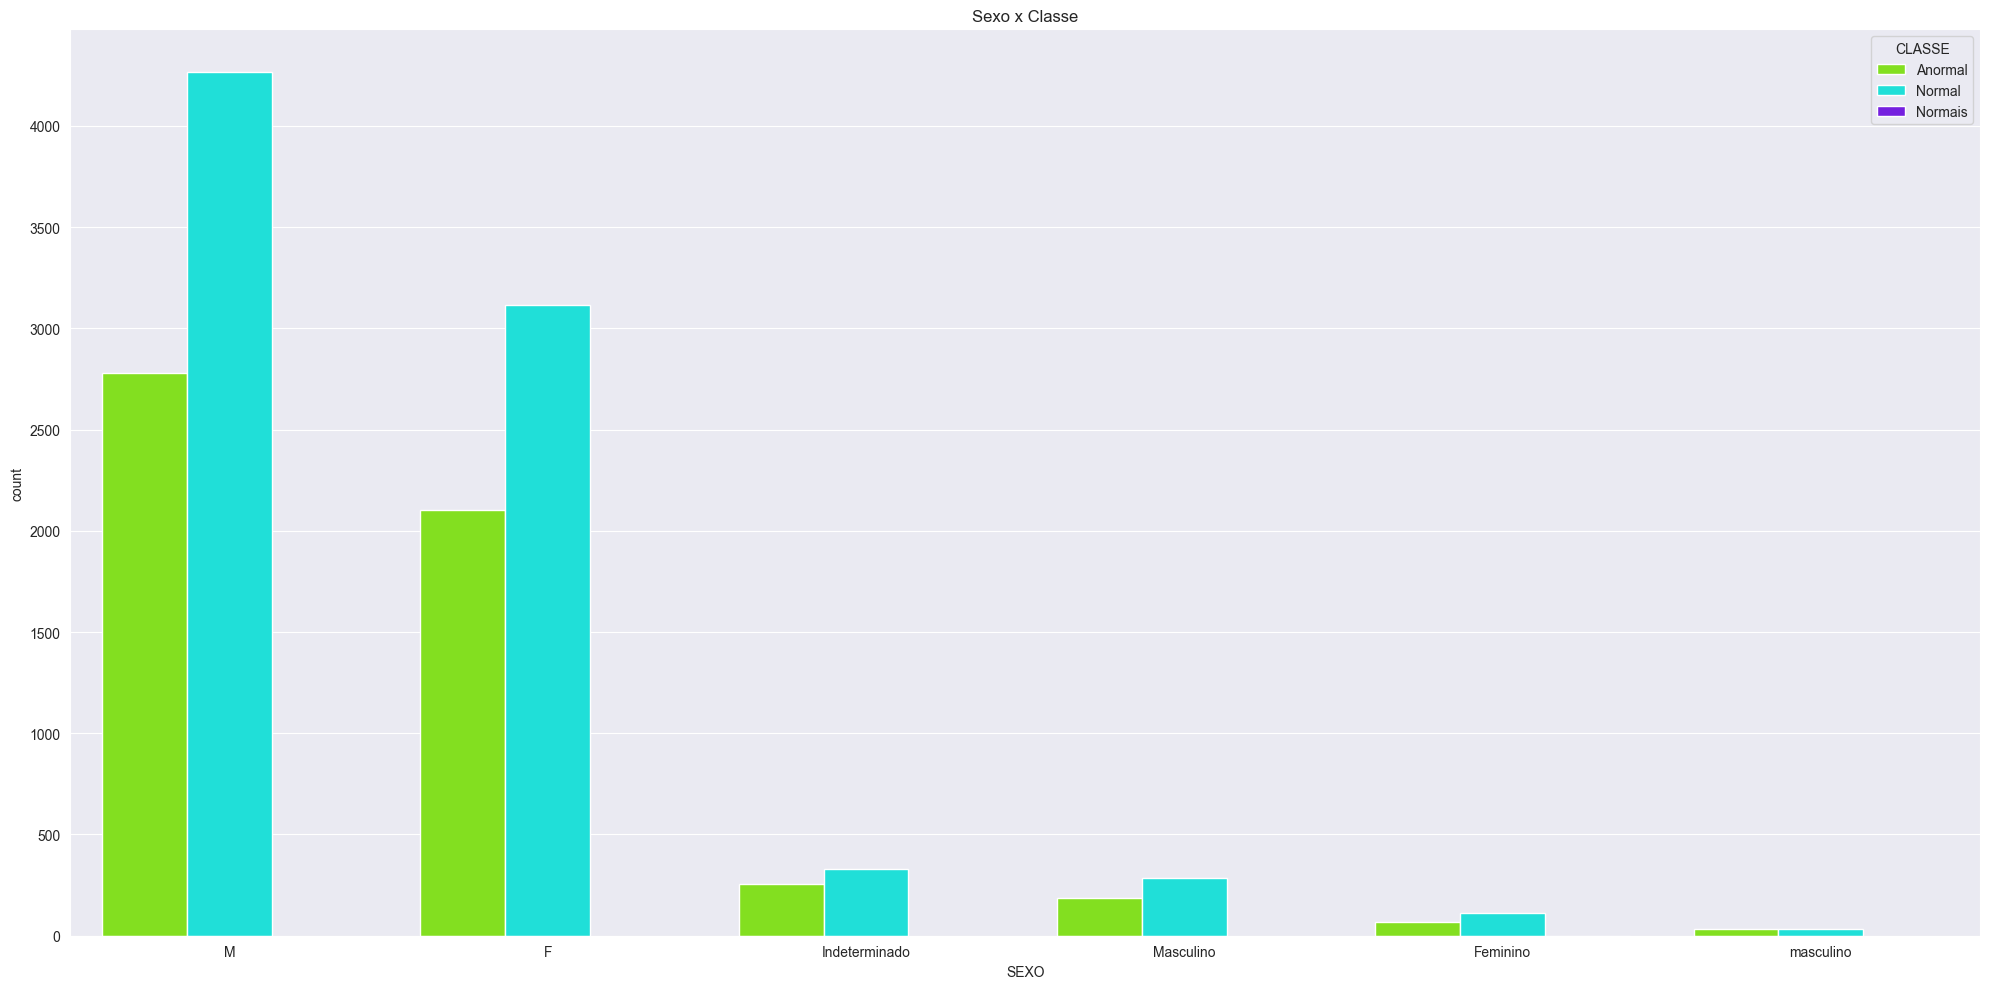

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.autolayout'] = True

# Evaluate the variable SEXO with CLASSE
sns.countplot(data=df_rhp_classe, x='SEXO', hue='CLASSE', palette='hsv')
plt.title('Sexo x Classe')
plt.show()

### 8. Evaluate possible outliers

In [14]:
variaveis_numericas = []
for i in df_rhp_classe.columns[0:22].tolist():
    if df_rhp_classe[i].dtype == 'int64' or df_rhp_classe[i].dtype == 'float64':
        variaveis_numericas.append(i)

print(variaveis_numericas)
print(len(variaveis_numericas))

['Id', 'Peso', 'Altura', 'IMC', 'PA SISTOLICA', 'PA DIASTOLICA']
6


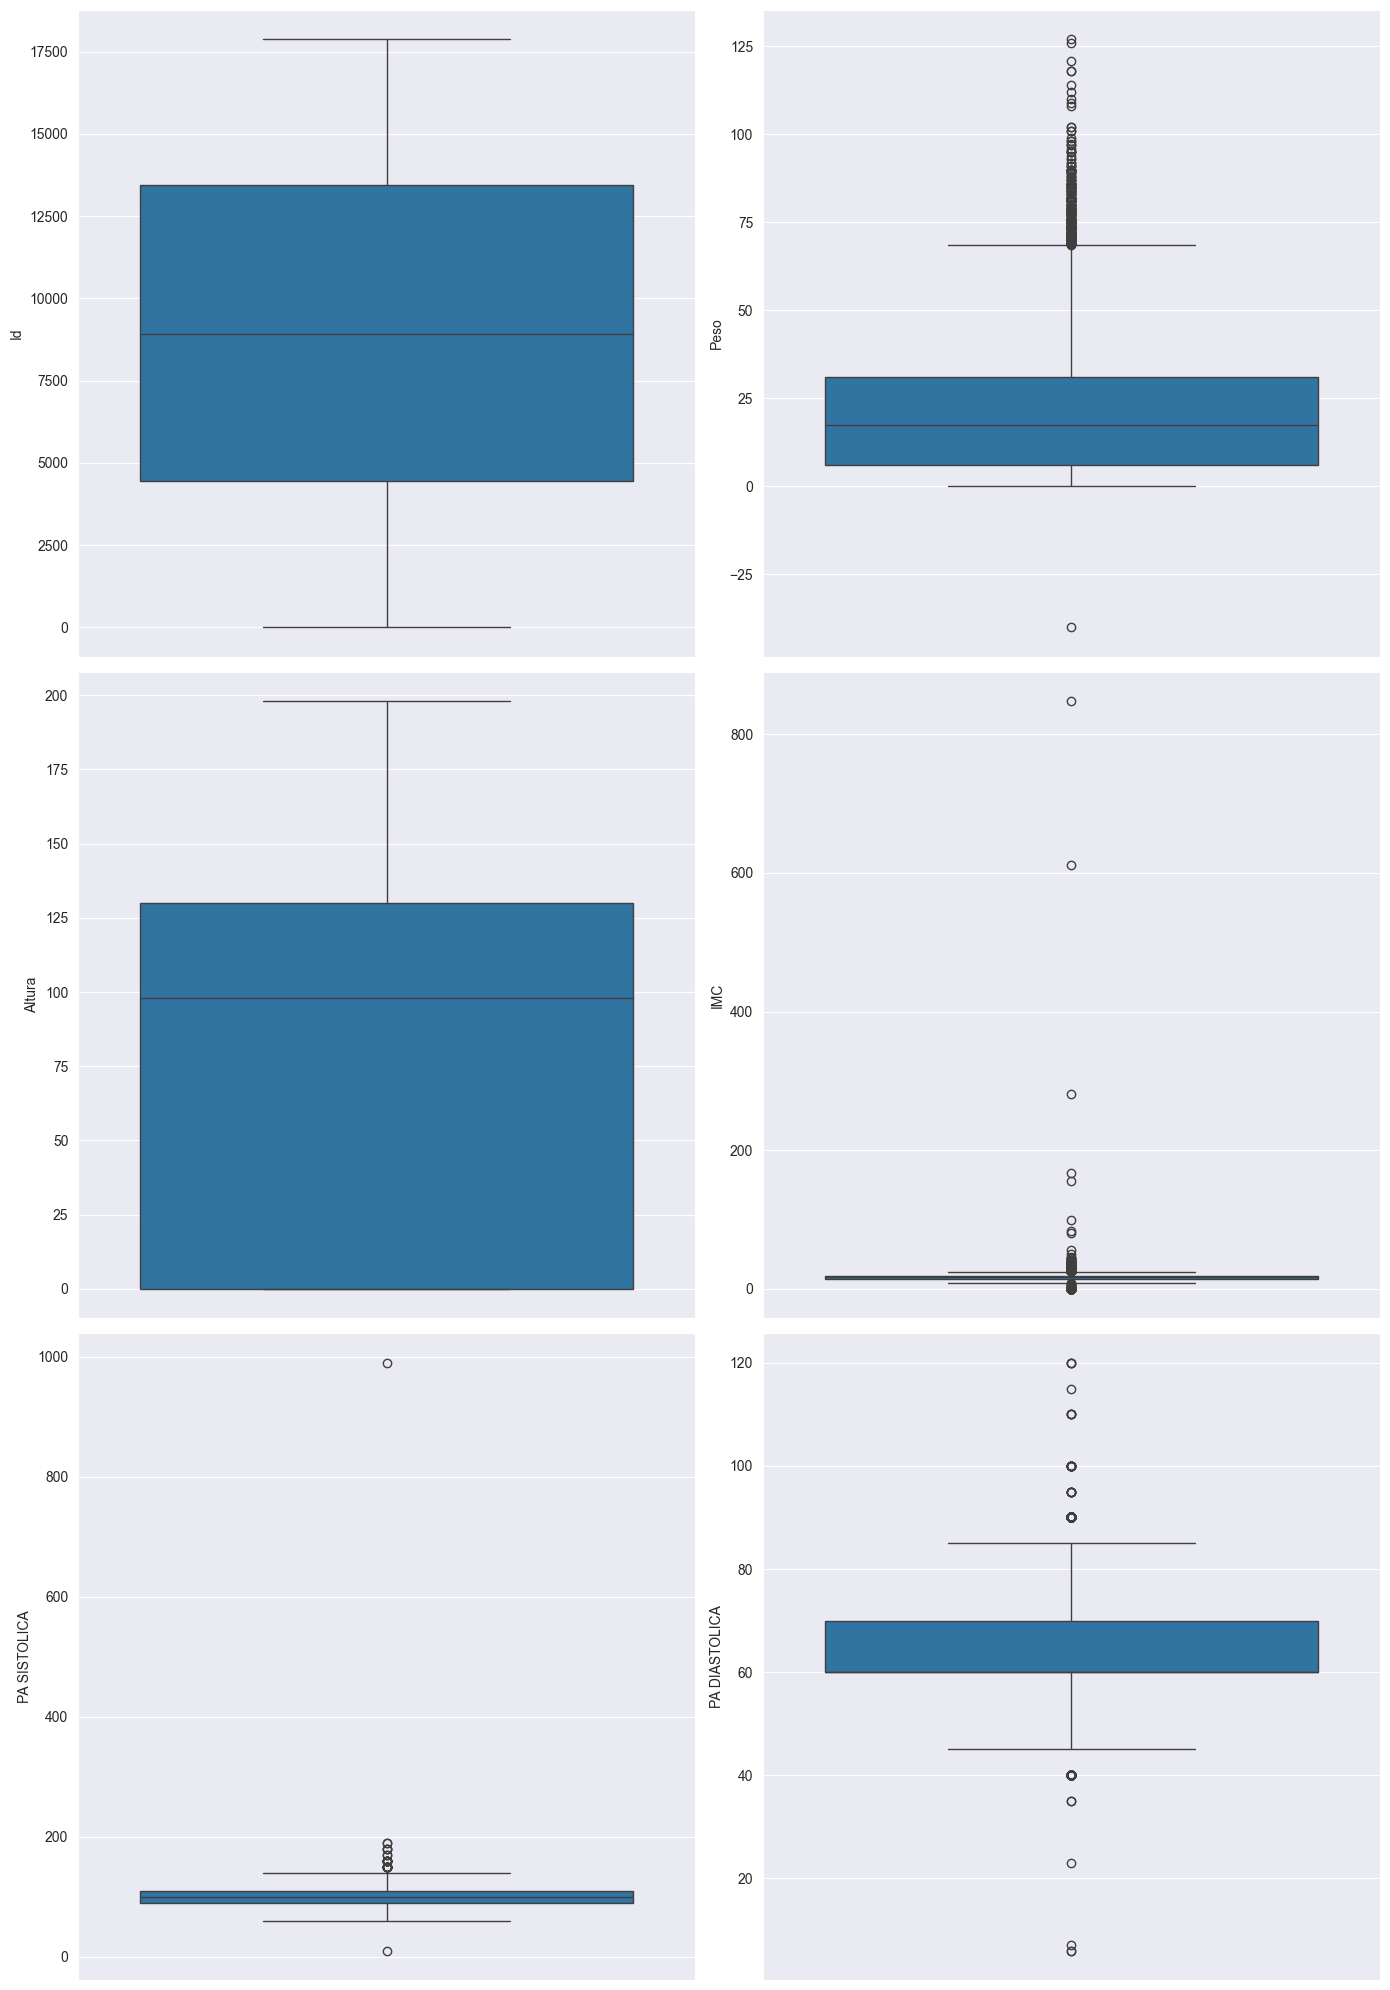

In [59]:
# Boxplot analysis
plt.rcParams['figure.figsize'] = (14.00, 20.00)
plt.rcParams['figure.autolayout'] = True
f, axes = plt.subplots(3, 2)

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data=df_rhp_classe, y=i, ax=axes[linha, coluna])
    coluna += 1
    if coluna > 1:
        linha += 1
        coluna = 0

plt.show()

### 9. Evaluate data distribution

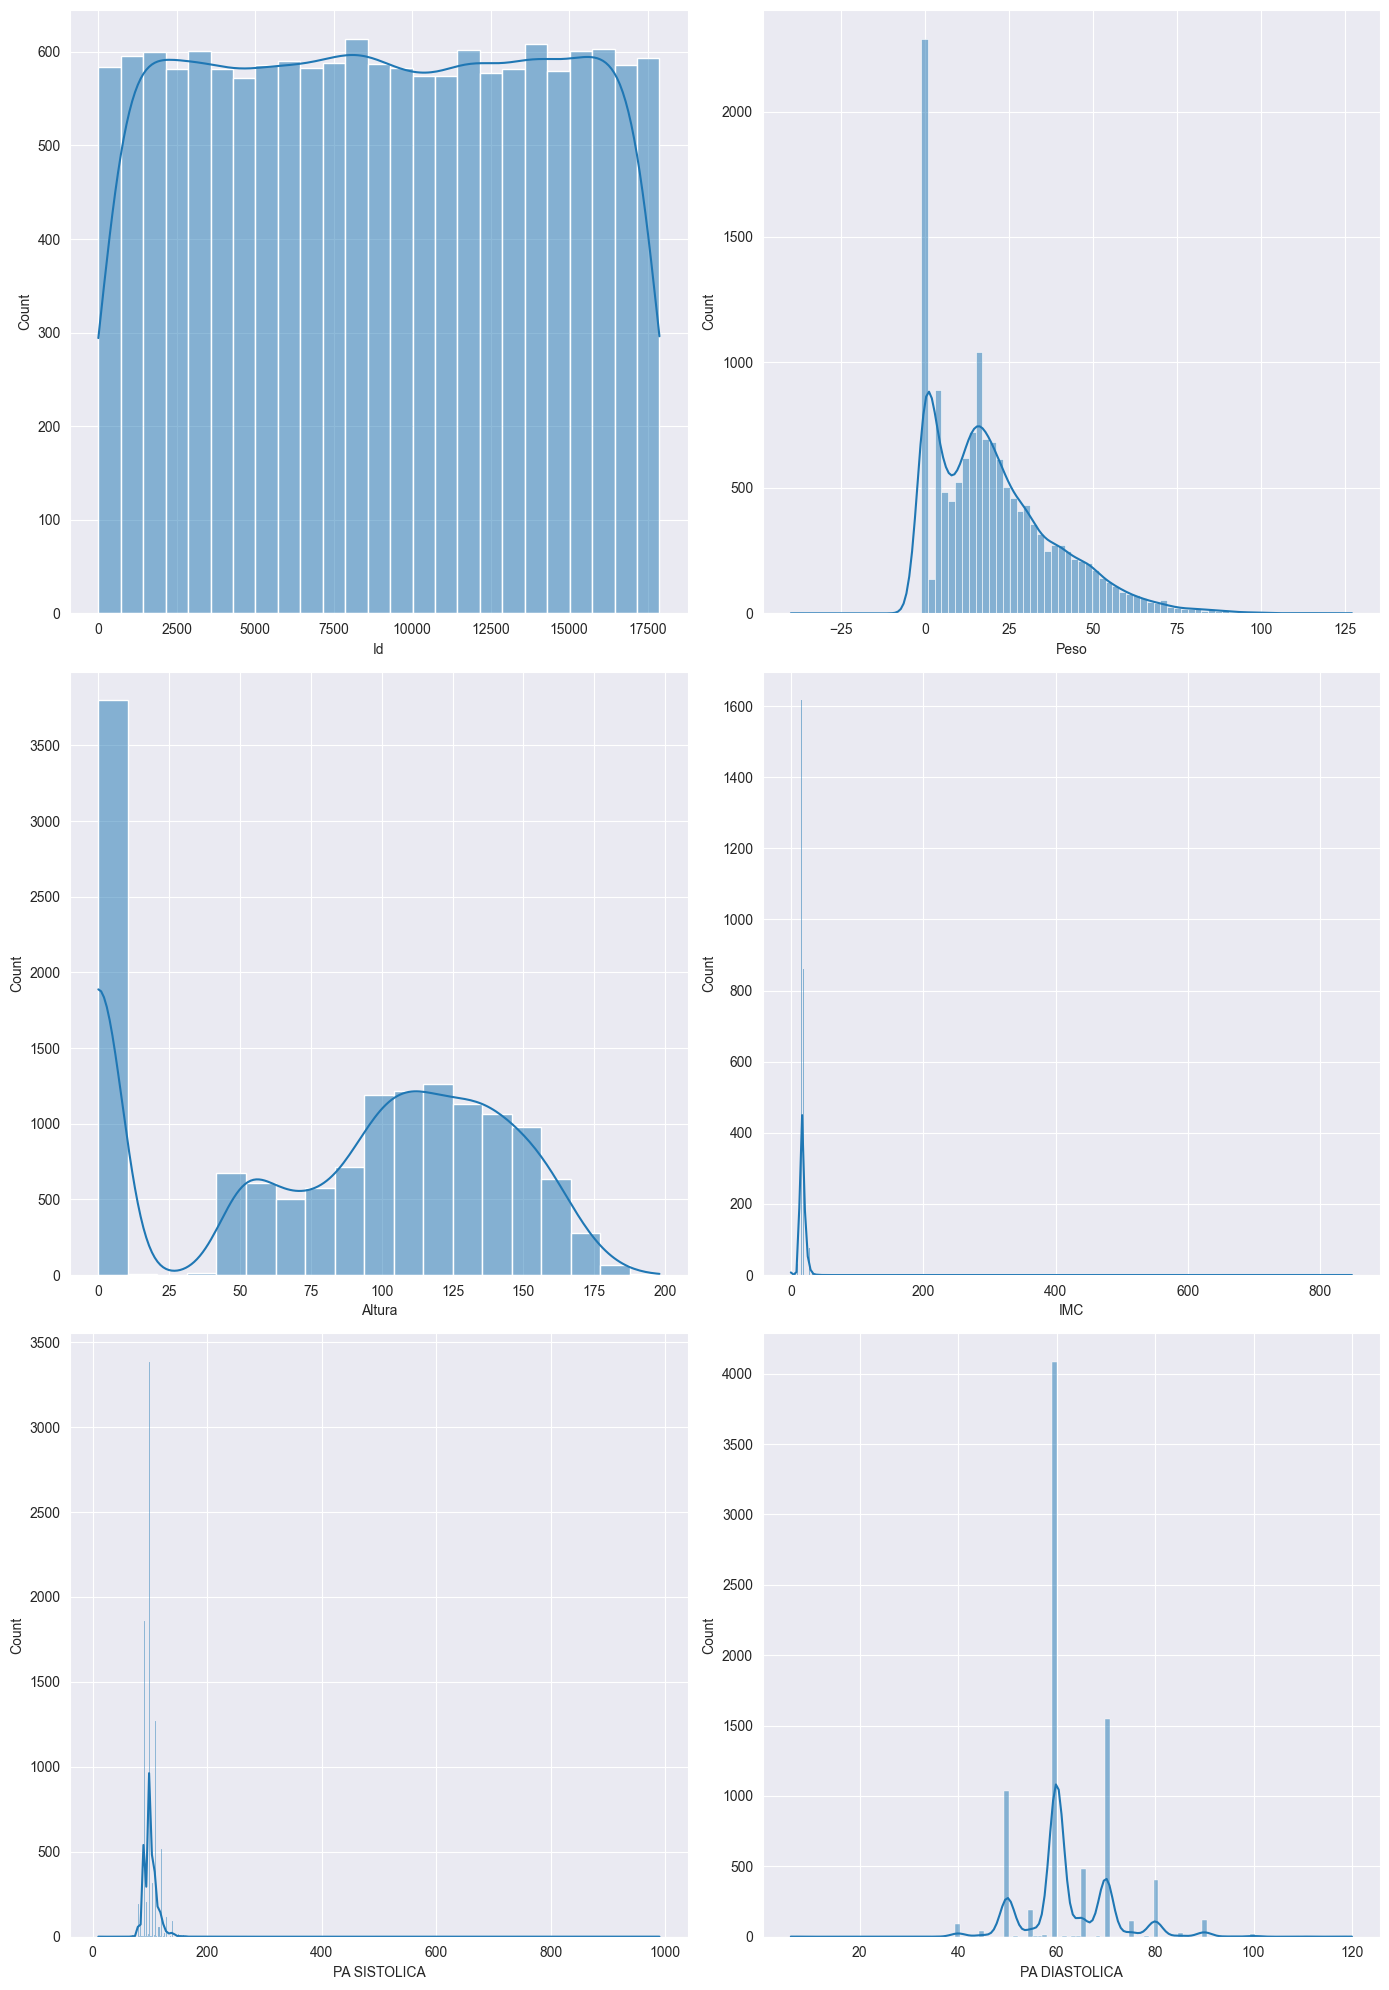

In [16]:
plt.rcParams['figure.figsize'] = (14.00, 20.00)
plt.rcParams['figure.autolayout'] = True
f, axes = plt.subplots(3, 2)

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.histplot(data=df_rhp_classe, x=i, ax=axes[linha][coluna], kde=True)
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

In [17]:
### 1. Handle Count os valores da coluna i, converte para string e conta os valores
# Mostra a quatidade distinta de informações em cada variável
for i in df_rhp_classe.columns[0:21].tolist():
    print(i, ':', len(df_rhp_classe[i].astype('str').value_counts()))

for i in df_rhp_classe.columns[0:21].tolist():
    print(df_rhp_classe.groupby(i).size())

Id : 14727
Peso : 695
Altura : 162
IMC : 56
Atendimento : 2064
DN : 6008
IDADE : 1928
Convenio : 408
PULSOS : 8
PA SISTOLICA : 46
PA DIASTOLICA : 36
PPA : 10
B2 : 6
SOPRO : 8
FC : 120
HDA 1 : 9
HDA2 : 9
SEXO : 7
MOTIVO1 : 6
MOTIVO2 : 17
CLASSE : 4
Id
2        1
3        1
4        1
6        1
7        1
8        1
9        1
11       1
12       1
13       1
14       1
15       1
18       1
19       1
20       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
30       1
31       1
32       1
34       1
36       1
38       1
39       1
40       1
41       1
42       1
44       1
45       1
46       1
47       1
50       1
51       1
52       1
54       1
55       1
56       1
57       1
58       1
59       1
60       1
61       1
62       1
63       1
64       1
65       1
67       1
69       1
70       1
71       1
72       1
73       1
74       1
76       1
77       1
78       1
79       1
80       1
81       1
82       1
83       1
84       1
86       1
8

### 1. Remove no used variables

In [18]:
# Remove the variables that will not be used in the analysis
colunas = ['Id', 'Peso', 'Altura', 'IMC', 'IDADE', 'PULSOS', 'PA SISTOLICA', 'PA DIASTOLICA', 'PPA', 'B2', 'SOPRO', 'FC', 'HDA 1', 'HDA2', 'SEXO', 'MOTIVO1', 'MOTIVO2']

df_rhp_classe_processed = pd.DataFrame(df_rhp_classe, columns=colunas)
df_rhp_classe_processed.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,2,3.50,50,14.00,0.02,Normais,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
1,3,0.00,0,NaN,-4.05,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
2,4,8.10,65,19.00,0.5,Normais,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
3,6,26.00,112,21.00,4.4,Normais,100.00,60.00,Normal,Desdob fixo,ausente,100,Assintomático,NaN,M,2 - Check-up,NaN
4,7,40.00,151,18.00,12.89,Normais,NaN,NaN,Não Calculado,Normal,ausente,96,Dor precordial,NaN,M,5 - Parecer cardiológico,NaN


### 2. Handling NULL or NaN values

In [19]:
df_rhp_classe_processed.isnull().sum()

Id                   0
Peso               260
Altura               0
IMC               4017
IDADE             1376
PULSOS            1192
PA SISTOLICA      6495
PA DIASTOLICA     6505
PPA                197
B2                1177
SOPRO             1165
FC                1895
HDA 1             4614
HDA2             14188
SEXO                 3
MOTIVO1           1073
MOTIVO2           4059
dtype: int64

In [52]:
# Handle null values with median
df_rhp_classe_processed['Peso'] = df_rhp_classe_processed['Peso'].fillna(df_rhp_classe_processed['Peso'].median())
df_rhp_classe_processed['IMC'] = df_rhp_classe_processed['IMC'].fillna(df_rhp_classe_processed['IMC'].median())
df_rhp_classe_processed['IDADE'] = df_rhp_classe_processed['IDADE'].fillna(0.01)
#df_rhp_classe_processed['PULSOS'] = df_rhp_classe_processed['PULSOS'].fillna(df_rhp_classe_processed['PULSOS'].median())
df_rhp_classe_processed['PA SISTOLICA'] = df_rhp_classe_processed['PA SISTOLICA'].fillna(df_rhp_classe_processed['PA SISTOLICA'].median())
df_rhp_classe_processed['PA DIASTOLICA'] = df_rhp_classe_processed['PA DIASTOLICA'].fillna(df_rhp_classe_processed['PA DIASTOLICA'].median())
#df_rhp_classe_processed['PPA'] = df_rhp_classe_processed['PPA'].fillna(df_rhp_classe_processed['PPA'].median())
#df_rhp_classe_processed['B2'] = df_rhp_classe_processed['B2'].fillna(df_rhp_classe_processed['B2'].median())

df_rhp_classe_processed.isnull().sum()

Id                   0
Peso                 0
Altura               0
IMC                  0
IDADE                0
PULSOS            1190
PA SISTOLICA         0
PA DIASTOLICA        0
PPA                197
B2                1175
SOPRO             1163
FC                1877
HDA 1             4568
HDA2             14067
SEXO                 3
MOTIVO1           1070
MOTIVO2           4024
dtype: int64

### 3. Handle Outliers



In [47]:
# Filter rows where 'IDADE' is less than 0
df_rhp_classe_processed[df_rhp_classe_processed['IDADE'] < 0]
df_rhp_classe_processed[df_rhp_classe_processed['IDADE'] < 0] = df_rhp_classe_processed['IDADE'].median()

df_rhp_classe_processed.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,2.00,3.50,50.00,14.00,0.02,Normais,100.00,60.00,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
1,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83
2,4.00,8.10,65.00,19.00,0.50,Normais,100.00,60.00,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
3,6.00,26.00,112.00,21.00,4.40,Normais,100.00,60.00,Normal,Desdob fixo,ausente,100,Assintomático,NaN,M,2 - Check-up,NaN
4,7.00,40.00,151.00,18.00,12.89,Normais,100.00,60.00,Não Calculado,Normal,ausente,96,Dor precordial,NaN,M,5 - Parecer cardiológico,NaN


In [49]:
# Filter rows where 'Peso' is less than 0
df_rhp_classe_processed[df_rhp_classe_processed['Peso'] < 0]

df_rhp_classe_processed['Peso'].median()

df_rhp_classe_processed[df_rhp_classe_processed['Peso'] < 0] = df_rhp_classe_processed['Peso'].median()

df_rhp_classe_processed.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,2.00,3.50,50.00,14.00,0.02,Normais,100.00,60.00,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
1,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83
2,4.00,8.10,65.00,19.00,0.50,Normais,100.00,60.00,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
3,6.00,26.00,112.00,21.00,4.40,Normais,100.00,60.00,Normal,Desdob fixo,ausente,100,Assintomático,NaN,M,2 - Check-up,NaN
4,7.00,40.00,151.00,18.00,12.89,Normais,100.00,60.00,Não Calculado,Normal,ausente,96,Dor precordial,NaN,M,5 - Parecer cardiológico,NaN


In [67]:
# Handle IMC
df_rhp_classe_processed[df_rhp_classe_processed['IMC'] > 85] = df_rhp_classe_processed['IMC'].median()

df_rhp_classe_processed.head()

0

In [73]:
#PA SISTÓLICA
df_rhp_classe_processed[df_rhp_classe_processed['PA SISTOLICA'] > 110].shape[0]

df_rhp_classe_processed[df_rhp_classe_processed['PA SISTOLICA'] > 110] = df_rhp_classe_processed['PA SISTOLICA'].median()

df_rhp_classe_processed.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,2.00,3.50,50.00,14.00,0.02,Normais,100.00,60.00,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
1,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83
2,4.00,8.10,65.00,19.00,0.50,Normais,100.00,60.00,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
3,6.00,26.00,112.00,21.00,4.40,Normais,100.00,60.00,Normal,Desdob fixo,ausente,100,Assintomático,NaN,M,2 - Check-up,NaN
4,7.00,40.00,151.00,18.00,12.89,Normais,100.00,60.00,Não Calculado,Normal,ausente,96,Dor precordial,NaN,M,5 - Parecer cardiológico,NaN


In [78]:
#PA DIASTÓLICA
df_rhp_classe_processed['PA DIASTOLICA'].median()
df_rhp_classe_processed[df_rhp_classe_processed['PA DIASTOLICA'] > 70].shape[0]
df_rhp_classe_processed[df_rhp_classe_processed['PA DIASTOLICA'] > 70] = df_rhp_classe_processed['PA DIASTOLICA'].median()
df_rhp_classe_processed.head()


,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,2.00,3.50,50.00,14.00,0.02,Normais,100.00,60.00,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
1,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83,4.83
2,4.00,8.10,65.00,19.00,0.50,Normais,100.00,60.00,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
3,6.00,26.00,112.00,21.00,4.40,Normais,100.00,60.00,Normal,Desdob fixo,ausente,100,Assintomático,NaN,M,2 - Check-up,NaN
4,7.00,40.00,151.00,18.00,12.89,Normais,100.00,60.00,Não Calculado,Normal,ausente,96,Dor precordial,NaN,M,5 - Parecer cardiológico,NaN


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.